## Neuronal Network with Keras
Create a classifier for a 'moons dataset' by implementing a neuronal network in Keras.

Plot the dataset


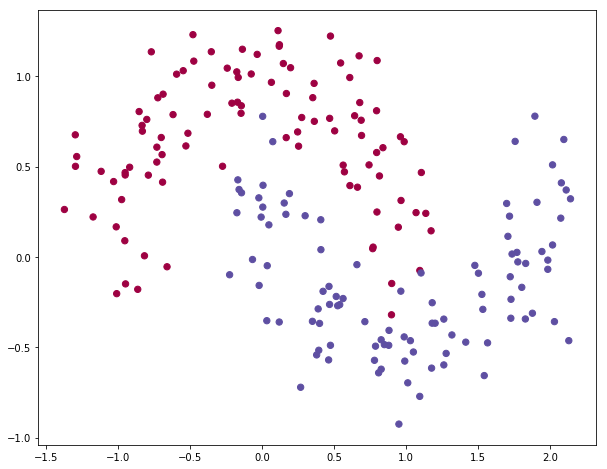

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

def plot_decision_boundary(X, y, pred_func):
    # Find the boundaries of the plot and give it some margin
    margin = 0.5
    x_min = X[:, 0].min() - margin
    x_max = X[:, 0].max() + margin
    y_min = X[:, 1].min() - margin
    y_max = X[:, 1].max() + margin
    step = 0.01
    # Generate a grid of points with some step size
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))    
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

# Generate a dataset and plot it
np.random.seed(100)
X_train, y_train = sklearn.datasets.make_moons(200, noise=0.20)

# X_train is a (200, 2) matrix
# y_train is a binary vector with 200 elements

print("Plot the dataset")
plt.scatter(X_train[:,0], X_train[:,1], s=40, c=y_train, cmap=plt.cm.Spectral)
plt.show()

## Train neuronal network model

In [20]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils
from keras.regularizers import l2


print "Build the model"
model = Sequential()
model.add(Dense(50, activation="relu", kernel_initializer="normal", input_dim=2))
model.add(Dense(1, activation="sigmoid", kernel_initializer="normal"))
sgd = SGD(lr = 0.1, momentum = 0.9, nesterov = True)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.fit(X_train, 
          y_train, 
          batch_size=8, 
          nb_epoch=20, 
          verbose=1, 
          validation_split=0.1)

scores = model.evaluate(X_train, y_train, verbose=0)

print("\nAccuracy: {}".format(scores[1]))


Build the model
Train on 180 samples, validate on 20 samples
Epoch 1/20
180/180 [==============================] - 0s - loss: 0.5952 - acc: 0.6556 - val_loss: 0.4131 - val_acc: 0.7500
Epoch 2/20
180/180 [==============================] - 0s - loss: 0.3409 - acc: 0.8556 - val_loss: 0.3658 - val_acc: 0.7000
Epoch 3/20
180/180 [==============================] - 0s - loss: 0.3331 - acc: 0.8333 - val_loss: 0.3889 - val_acc: 0.8000
Epoch 4/20
180/180 [==============================] - 0s - loss: 0.3385 - acc: 0.8611 - val_loss: 0.3942 - val_acc: 0.8500
Epoch 5/20
180/180 [==============================] - 0s - loss: 0.3129 - acc: 0.8722 - val_loss: 0.3438 - val_acc: 0.7500
Epoch 6/20
180/180 [==============================] - 0s - loss: 0.3087 - acc: 0.8444 - val_loss: 0.3460 - val_acc: 0.8500
Epoch 7/20
180/180 [==============================] - 0s - loss: 0.3022 - acc: 0.8722 - val_loss: 0.3460 - val_acc: 0.7500
Epoch 8/20
180/180 [==============================] - 0s - loss: 0.2975 - acc:

## Confusion matrix

In [15]:
print("Confusion matrix:")
y_pred = model.predict_classes(X_train, verbose = 0)
y_pred = np.squeeze(y_pred)
confusion_matrix = pd.crosstab(y_train, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
print(confusion_matrix)

Confusion matrix:
Predicted   0    1  All
True                   
0          98    2  100
1           1   99  100
All        99  101  200


## Plot decision boundary

143072/143736 [============================>.] - ETA: 0s

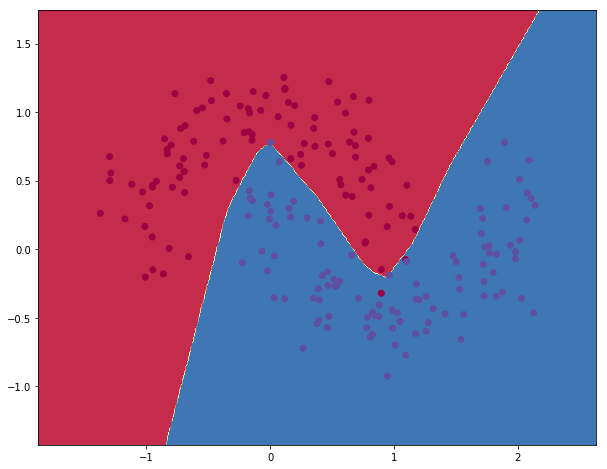

In [16]:
plot_decision_boundary(X_train, y_train, model.predict_classes)